<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
housing=pd.read_csv(boston_url)
housing.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
housing.drop(columns=['Unnamed: 0'], inplace=True)
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Task 1: Familiarize with the dataset

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


### Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:
* For the "Median value of owner-occupied homes" provide a boxplot
* Provide a  bar plot for the Charles river variable
* Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
* Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
* Create a histogram for the pupil to teacher ratio variable

#### For the "Median value of owner-occupied homes" provide a boxplot

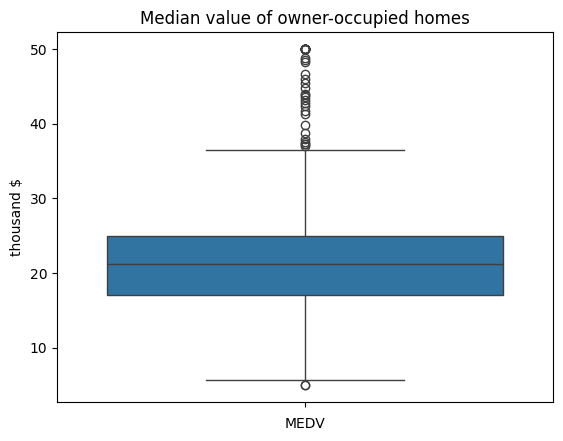

In [9]:
ax = sns.boxplot(y='MEDV', data=housing)
pyplot.xlabel('MEDV')
pyplot.ylabel('thousand $')
pyplot.title('Median value of owner-occupied homes')
pyplot.show()

From the boxplot we can infer that the mean Median value of owner-occupied homes is around 20-21k dollars, and the majority of values are equally distributed around the mean value. We can also see that there is a certain amount of outliers that should be investigated. 

#### Provide a  bar plot for the Charles river variable

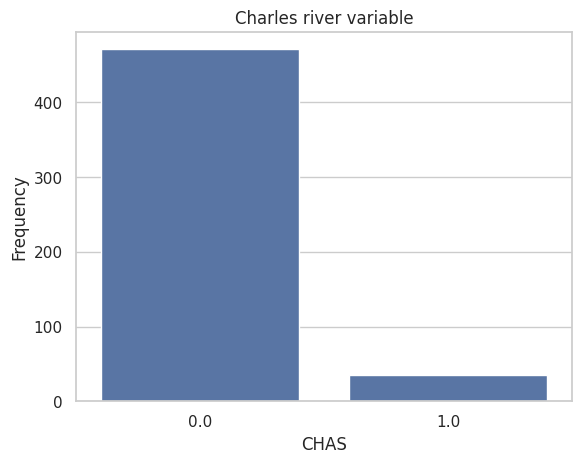

In [10]:
sns.set(style='whitegrid')
ax = sns.barplot(housing.CHAS.value_counts())
pyplot.xlabel('CHAS')
pyplot.ylabel('Frequency')
pyplot.title('Charles river variable')
pyplot.show()

The barplot shows that the majority of the houses does not have a tract bounding with the Charles river.

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

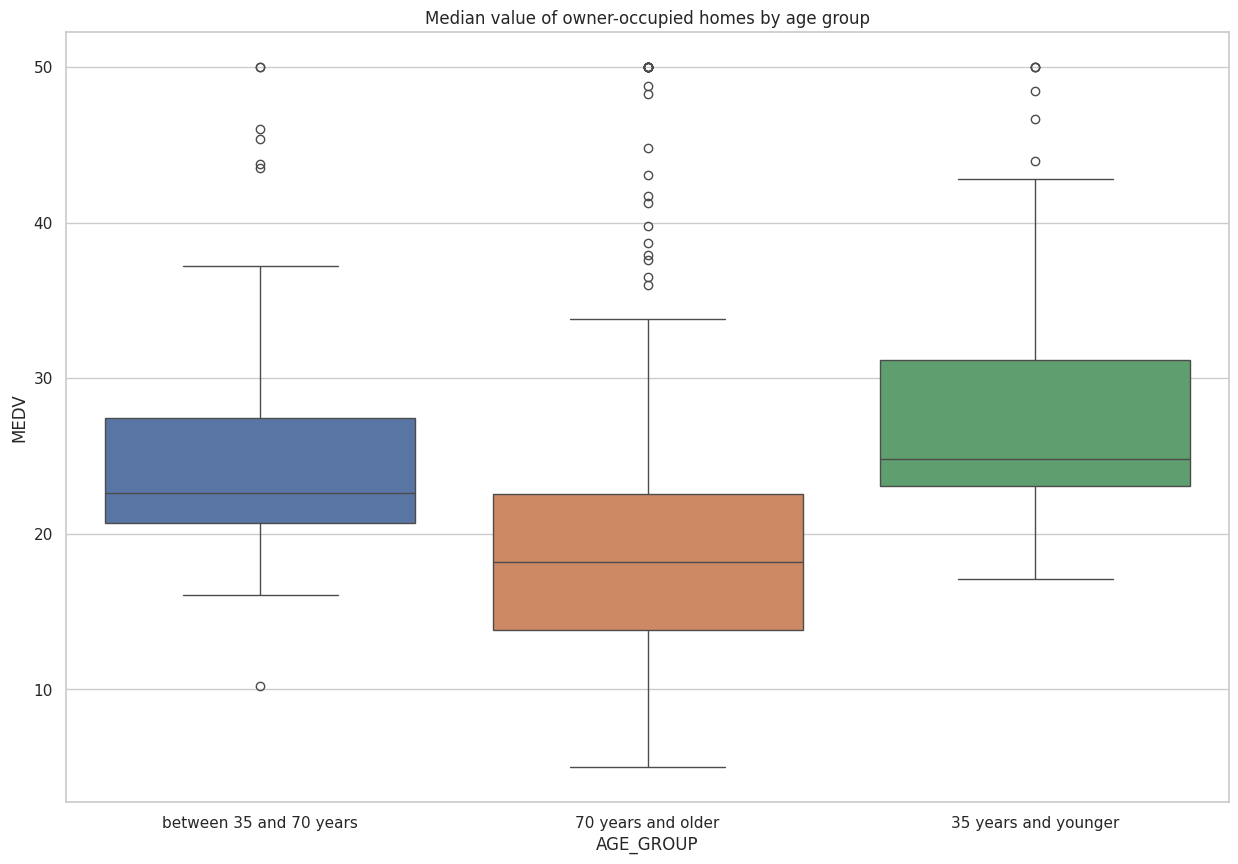

In [11]:
housing.loc[(housing['AGE']<=35), 'AGE_GROUP'] = '35 years and younger'
housing.loc[(housing['AGE']>35)&(housing['AGE']<70), 'AGE_GROUP'] = 'between 35 and 70 years'
housing.loc[(housing['AGE']>70), 'AGE_GROUP'] = '70 years and older'

pyplot.figure(figsize=(15,10))

sns.set(style='whitegrid')
ax = sns.boxplot(x='AGE_GROUP',y='MEDV', data=housing, hue='AGE_GROUP')
pyplot.xlabel('AGE_GROUP')
pyplot.ylabel('MEDV')
pyplot.title('Median value of owner-occupied homes by age group')
pyplot.show()

Houses 35 years and younger: The average median value is around 21-22k and the distribution of the values seems to be left skewed, with the majority of the values falling on the right of the mean value. There are some outliers on the higher part of the MEDV axis to be investigated.

Houses between 35 and 70: The average median value is around 25k and the distribution of the values seems to be left skewed, with the majority of the values falling on the right of the mean value. There are some outliers on the higher part of the MEDV axis to be investigated.

Houses 70 years and older: The average median value is around 18/19k and the values seem to be equally distributed around the mean. There are some outliers on the higher part of the MEDV axis to be investigated.

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

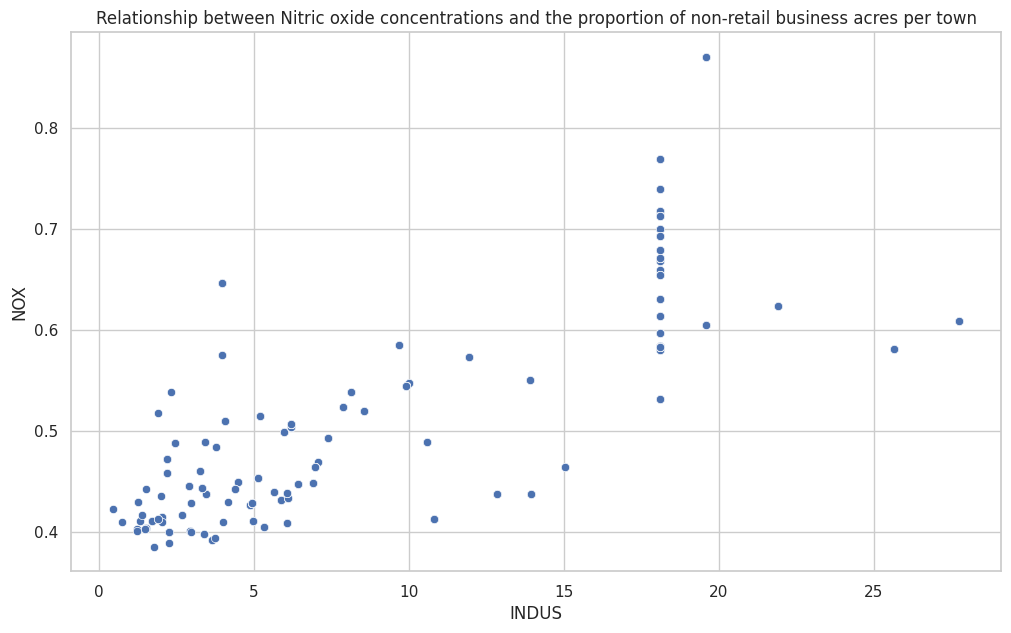

In [12]:
pyplot.figure(figsize=(12, 7))

sns.set(style='whitegrid')
ax = sns.scatterplot(x='INDUS',y='NOX', data=housing)
pyplot.xlabel('INDUS')
pyplot.ylabel('NOX')
pyplot.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
pyplot.show()

From this scatterplot we can infer that the Nitrix Oxide concentrations increas slowly and with more sparse values for lower proportions of non-retail business acres per town (under 15). For proportion equal to 18 we have a very different values of NOX concentration, and for higher proportions we have definitely less and more sparse values.

#### Create a histogram for the pupil to teacher ratio variable

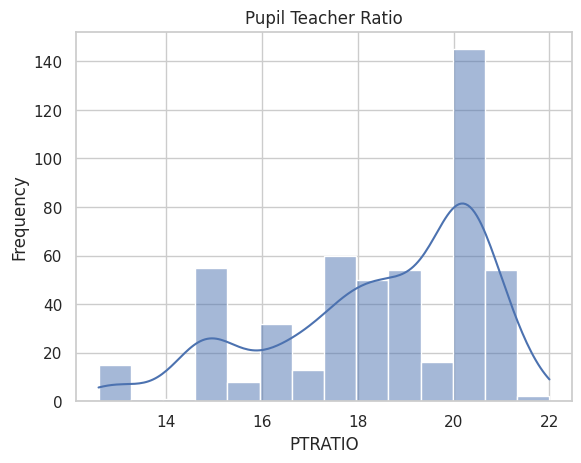

In [17]:
sns.set(style='whitegrid')
ax = sns.histplot(x='PTRATIO', data=housing, kde=True)
pyplot.xlabel('PTRATIO')
pyplot.ylabel('Frequency')
pyplot.title('Pupil Teacher Ratio')
pyplot.show()

The values for the pupil teacher-ratio are not normally distributed, with a peak around 20 and the majority of values fall under 20.

### Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions:
* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:
* State your hypothesis.
* Use α = 0.05
* Perform the test Statistics.
* State the conclusion from the test.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis:
* H0: there's no significant difference in median value of houses bounded by the Charles river and those that are not.
* H1: there's a difference in median value of houses bounded by the Charles river and those that are not.

α = 0.05

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

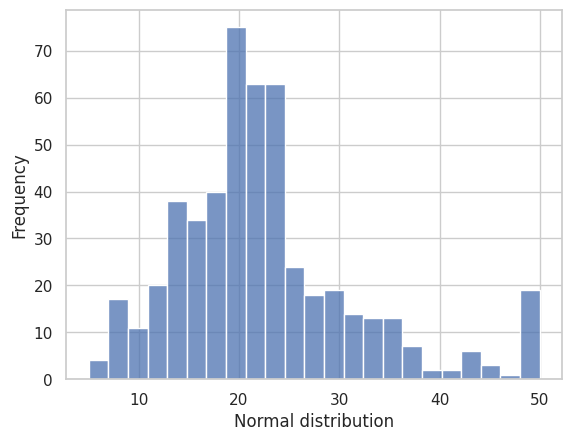

In [19]:
ax = sns.histplot(housing['MEDV'])
ax.set(xlabel='Normal distribution', ylabel='Frequency')

scipy.stats.ttest_ind(
    housing[housing['CHAS']==0]['MEDV'],
    housing[housing['CHAS']==1]['MEDV'],
    equal_var=True
)

**Conclusion**: the p-value is lower than α so we will reject the null hypothesis as there's statistical difference between the median value of houses bounded by the Charles river and those that are not. 

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis:
* H0: there's no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.
* H1: there's a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

α = 0.05

In [23]:
thirtyfive_lower = housing[housing['AGE_GROUP']=='35 years and younger']['MEDV']
thirtyfive_seventy = housing[housing['AGE_GROUP']=='between 35 and 70 years']['MEDV']
seventy_older = housing[housing['AGE_GROUP']=='70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_statistic: {0}, P-value: {1}".format(f_statistic, p_value))

F_statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


**Conclusion**: the p-value is lower than α so we will reject the null hypothesis as there's statistical a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis:
* H0: there's no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
* H1: there's a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

α = 0.05

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

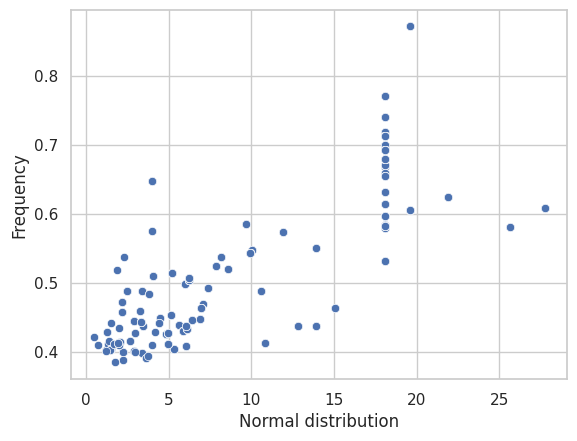

In [24]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=housing)
ax.set(xlabel='Normal distribution', ylabel='Frequency')

scipy.stats.pearsonr(housing['INDUS'], housing['NOX'])

**Conclusion**: the p-value is lower than α so we will reject the null hypothesis as there's a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Hypothesis:
* H0: additional weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes.
* H1: additional weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes.

α = 0.05

In [25]:
X = housing['DIS']
y = housing['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        17:56:36   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**: the p-value is lower than α so we will reject the null hypothesis as there's statistical evidence that the additional weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes.